In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
from sklearn.datasets import load_boston, load_iris
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.cluster import DBSCAN
set_config(display='diagram')


import pandas as pd
np.random.seed(123)

import warnings
warnings.filterwarnings('ignore')

# Unsupervised learning

Unsupervised learning is a branch of machine learning that is used to find underlying patterns in data.


Unsupervised learning does not use labeled data like supervised learning, but instead focuses on the data’s features. 
Labeled training data has a corresponding output for each input. 
When using unsupervised learning, we are not concerned with the targeted outputs because the goal of the algorithm is to find relationships within the data and group data points based on the input data alone. 
Supervised learning is concerned with labeled data in order to make predictions, but unsupervised learning is not.

The goal of unsupervised learning algorithms is to analyze data and find important features. 
Unsupervised learning will often find subgroups or hidden patterns within the dataset that a human observer may not pick up on. 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dimensionality-reduction" data-toc-modified-id="Dimensionality-reduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dimensionality reduction</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>t-SNE</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#k-means" data-toc-modified-id="k-means-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>k-means</a></span><ul class="toc-item"><li><span><a href="#Choosing-k" data-toc-modified-id="Choosing-k-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Choosing k</a></span></li></ul></li><li><span><a href="#DBSCAN" data-toc-modified-id="DBSCAN-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>DBSCAN</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Dimensionality reduction

##  PCA

Principal component analysis or PCA is used in exploratory data analysis and for making predictive models. 

PCA can be used to visualize high dimensional data in, tipically, 2 dimensions. How? By projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

The principal components (PC) of a collection of data points are the most relevant features of your data.

The first component is a weighted linear combination of all the original features where the sum of the squared weights equals 1. 
These weights are the loading factors. 
The loading factors of the first principal component maximize the weighted sum of the features for each observation.

The second principal component is uncorrelated with the first which makes it orthogonal to it.

The first PC can also be interpreted as the line closest to the data.

It's very important to **scale the data first to obtain mean = 0, std = 1**. The variances won't make sense otherwise.



### Proportion of variance explained

Each principal component explains some of the variance of the original data. 
We can find the proportion that each principal component explains by dividing each components variance by the total raw variance. 
Summing all the variances for each component equals 1.

Examine a screen plot (for an elbow) to choose the number of principal components to use. Or can use cross validation to choose.




In [4]:
data = load_iris()

In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [12]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
pca_pipeline = make_pipeline(
                    # eliminar NANs y cambiarlos a numeros
                    #np.nan_to_num(),
                    # primero, normalizar los datos
                    StandardScaler(),
                    # segundo, hacer la PCA
                    PCA(2)             
)

In [16]:
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [17]:
# Extraigo del pipeline la información del análisis PCA
pca = pca_pipeline.named_steps['pca']

In [21]:
pca.explained_variance_ratio_

# los valores que devuelve significan la cantidad de varianza explicada por cada componente

array([0.72962445, 0.22850762])

In [22]:
# el porcentaje de variabilidad de los datos que explican mis dos componentes principales
0.72962445 + 0.22850762

0.95813207

In [23]:
transformed_X = pca_pipeline.transform(X)

In [37]:
pd.DataFrame(transformed_X)

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [27]:
my_data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
my_data['species'] = pd.Series(data['target'], name='target')

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

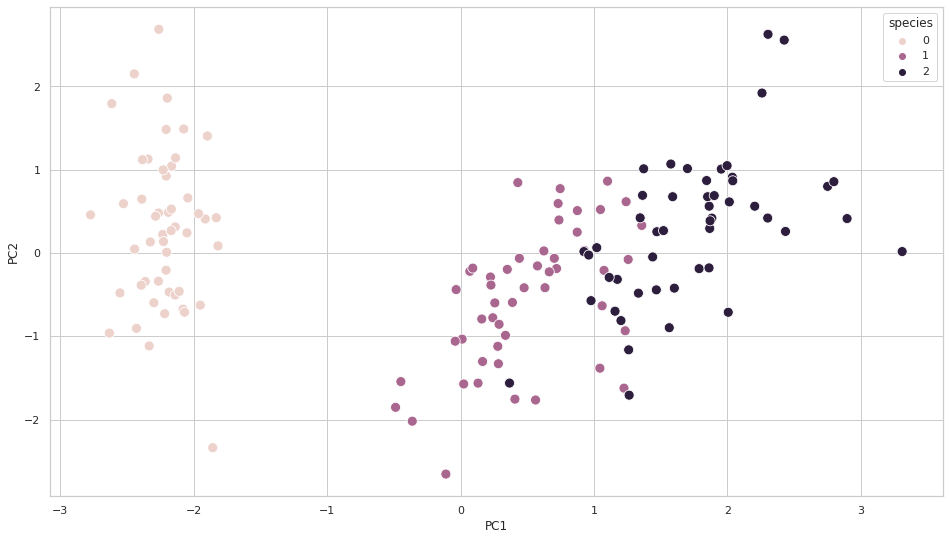

In [29]:
sns.scatterplot('PC1', 'PC2', data=my_data, hue='species', s=100)

In [32]:
cps = pca.components_.T  # la .T gira los datos de forma que las filas son columnas.
cps_matrix = pd.DataFrame(cps, columns=['PC1', 'PC2'], index=X.columns)
cps_matrix

,PC1,PC2
sepal length (cm),0.521066,0.377418
sepal width (cm),-0.269347,0.923296
petal length (cm),0.580413,0.024492
petal width (cm),0.564857,0.066942


In [ ]:
PC1 = (0.521066 * sepal_length) + (-0.269347 * sepal_width) + ...
PC2 = (0.377418 * sepal_length) + (0.923296 * sepal_width) + ...

In [33]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008.


### How it works

1. **Measure similarities between points in the high dimensional space.** Think of a bunch of data points scattered on a 2D space (Figure 2). For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. 

    This gives us a set of probabilities (**$P_{ij}$**) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors. Normal range for perplexity is between 5 and 50.
    
    

2. **Similar to the previous step but instead of using a Gaussian distribution you use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution.** This gives us a second set of probabilities (**$Q_{ij}$**) in the low dimensional space. The Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.



3. The last step is that we want these set of probabilities from the low-dimensional space (**$Q_{ij}$**) to reflect those of the high dimensional space (**$P_{ij}$**) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

![](images/tsne.png)

### Diferences with PCA

PCA is a linear dimension reduction technique that seeks to maximize variance and preserves large pairwise distances. In other words, things that are different end up far apart. This can lead to poor visualization especially when dealing with non-linear structures.

t-SNE differs from PCA by preserving only small pairwise distances or local similarities whereas PCA is concerned with preserving large pairwise distances to maximize variance.

In [38]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
tsne = TSNE(n_components=2, perplexity=30)
transformed_X = tsne.fit_transform(X)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

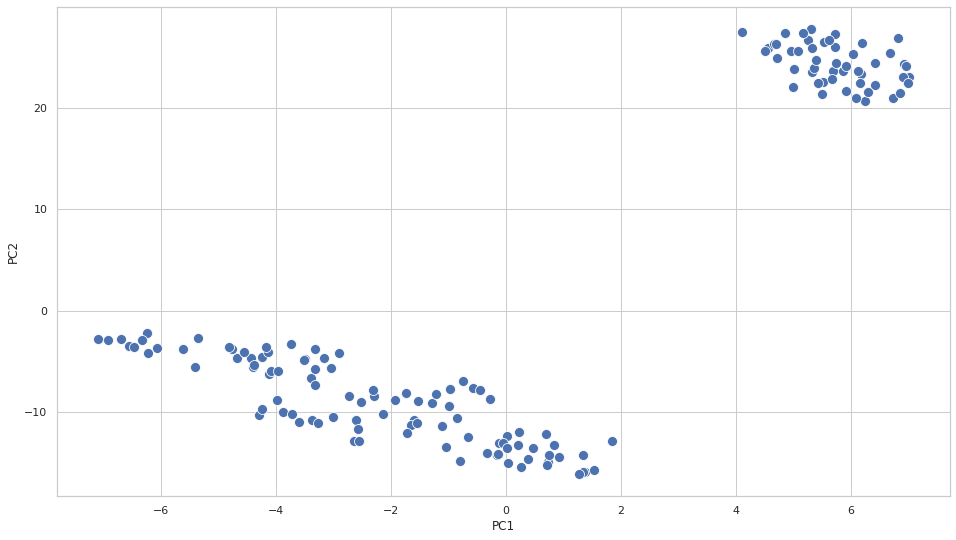

In [47]:
my_data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
my_data['species'] = pd.Series(data['target'], name='target')

sns.scatterplot('PC1', 'PC2', data=my_data, s=100)

# Clustering

Cluster analysis or clustering is a task with a simple objective: Finding groups (i.e., a structure) in data by grouping the elements that are more similar to each other.

Cluster analysis itself is not one specific algorithm, but the general task to be solved.

## k-means

Clustering algorithm where you define the number of clusters ahead of time.

The algorithm works iteratively by first randomly assigning each point to a cluster and computing cluster centers. All points are then reassigned based on euclidean distance to centroids. A new centroid is found by averaging the points in each cluster. Process stops after centroids stop moving or some max number of iterations.

This [GIF](https://miro.medium.com/max/637/1*Nx6IyGfRAV1ly6uDGnVCxQ.gif) illustrates the process pretty well.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

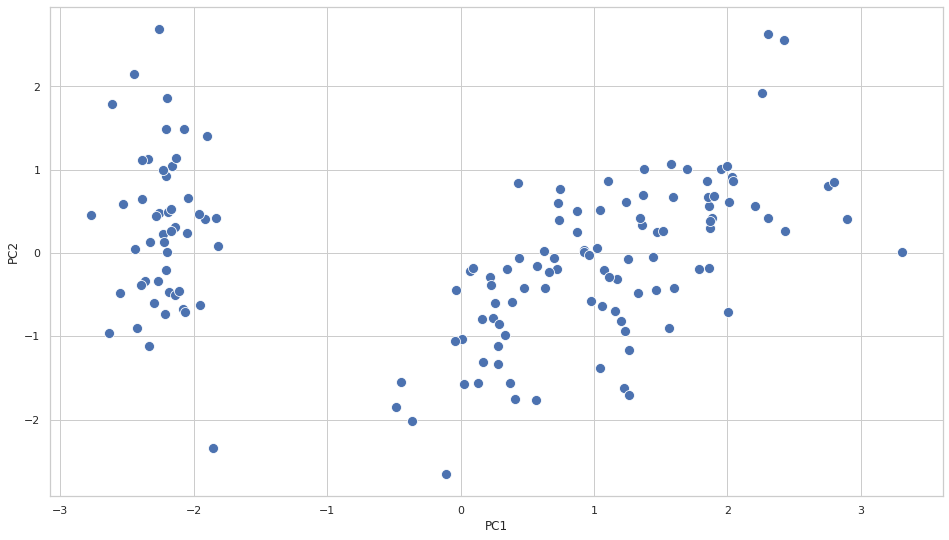

In [48]:
transformed_X = pca_pipeline.transform(X)

my_data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
my_data['species'] = pd.Series(data['target'], name='target')

sns.scatterplot('PC1', 'PC2', data=my_data, s=100)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

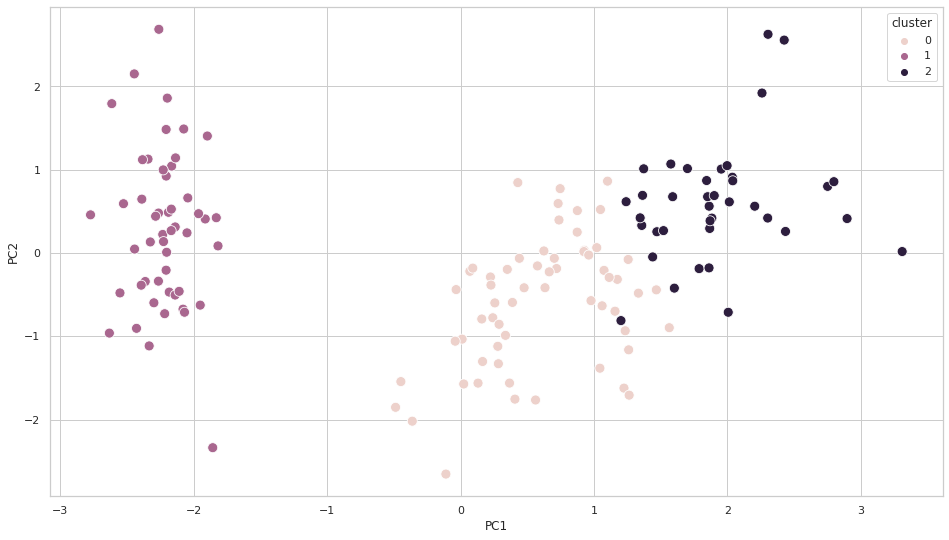

In [50]:
k_means = KMeans(n_clusters=3, random_state=0)

k_means.fit(X)

my_data['cluster'] = k_means.labels_

sns.scatterplot('PC1', 'PC2', data=my_data, hue='cluster', s=100)

### Choosing k

#### Elbow criteria

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. 
We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out.

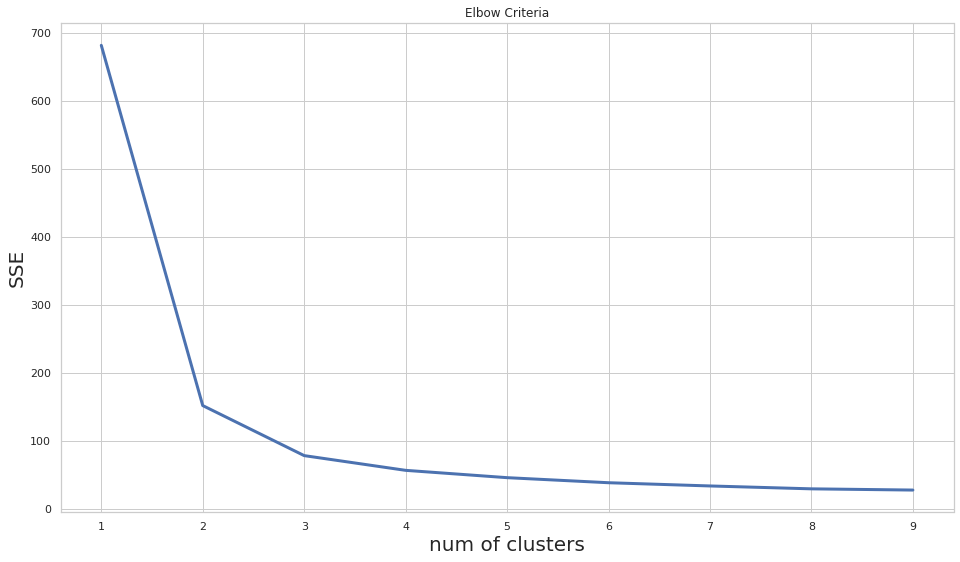

In [51]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [km[i].fit(X).inertia_ for i in range(len(km))]
plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('SSE', size=20)
plt.plot(Ks, score, lw=3)

#### Silhoutte Coefficient

Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:

  1. Compute the average distance from all data points in the same cluster (ai).
  2. Compute the average distance from all data points in the closest cluster (bi).
  3. Compute the coefficient: $$\frac{b^i-a^i}{max(a^i,b^i)}$$
  

The coefficient can take values in the interval $[-1, 1]$.

  - If it is 0 –> the sample is very close to the neighboring clusters.
  - It it is 1 –> the sample is far away from the neighboring clusters.
  - It it is -1 –> the sample is assigned to the wrong clusters.
  
Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters. We’ll use here geyser dataset again because its cheaper to run the silhouette analysis and it is actually obvious that there is most likely only two groups of data points.

In [53]:
silhouette_score(transformed_X, labels=k_means.labels_)

0.488706277807768

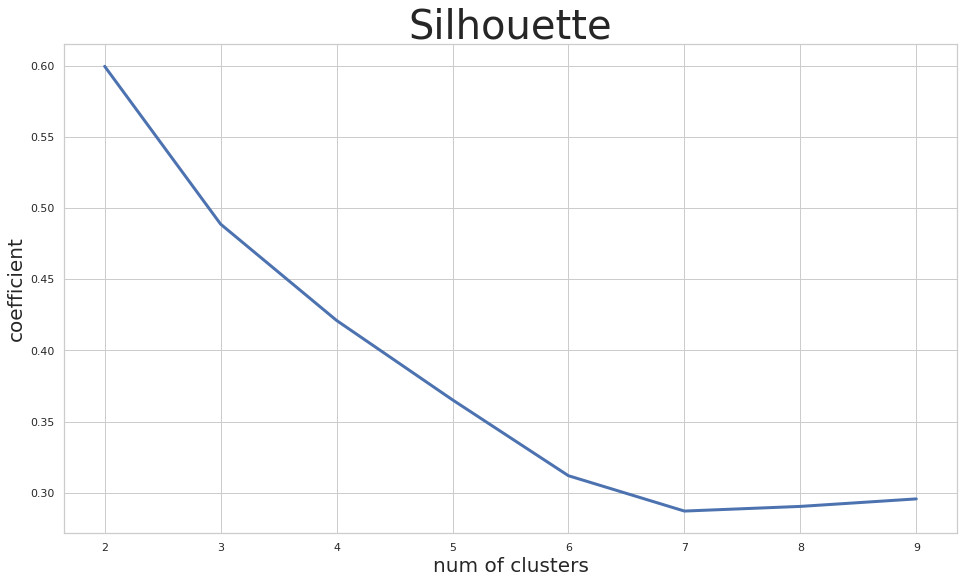

In [55]:
Ks = range(2, 10)
km = [KMeans(n_clusters=i, random_state=0) for i in Ks]
score = [silhouette_score(transformed_X, labels=km[i].fit(X).labels_) for i in range(len(km))]
plt.title('Silhouette', size=40)
plt.xlabel('num of clusters', size=20)
plt.ylabel('coefficient', size=20)
plt.plot(Ks, score, lw=3)

### DBSCAN


**Density-based spatial clustering of applications with noise (DBSCAN)** is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996.

It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). 

DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature It even recevied an award in 2004).

![DBSCAN overview](images/DBSCAN.png)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

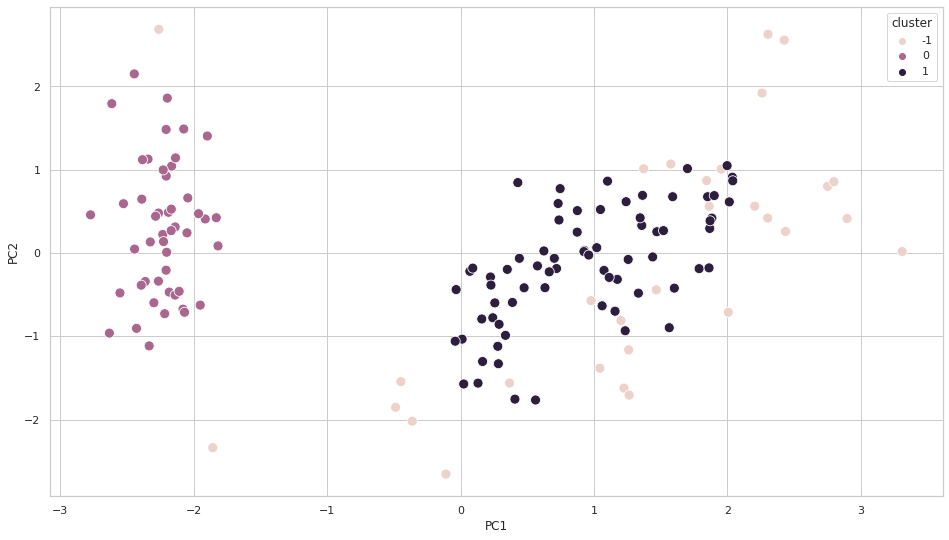

In [58]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan.fit(X)

my_data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
my_data['species'] = pd.Series(data['target'], name='target')
my_data['cluster'] = dbscan.labels_

sns.scatterplot('PC1', 'PC2', data=my_data, s=100, hue='cluster')

## Hierarchical Clustering

In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. 

Strategies for hierarchical clustering generally fall into two types:

  - **Agglomerative**: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
  - **Divisive**: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering are usually presented in a dendrogram. 

The standard algorithm for hierarchical agglomerative clustering (HAC) has a time complexity of $O(n^3)$ and requires $\Omega(n^2)$ memory, which makes it too slow for even medium data sets. 

In [60]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

In [62]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, 
                                      model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

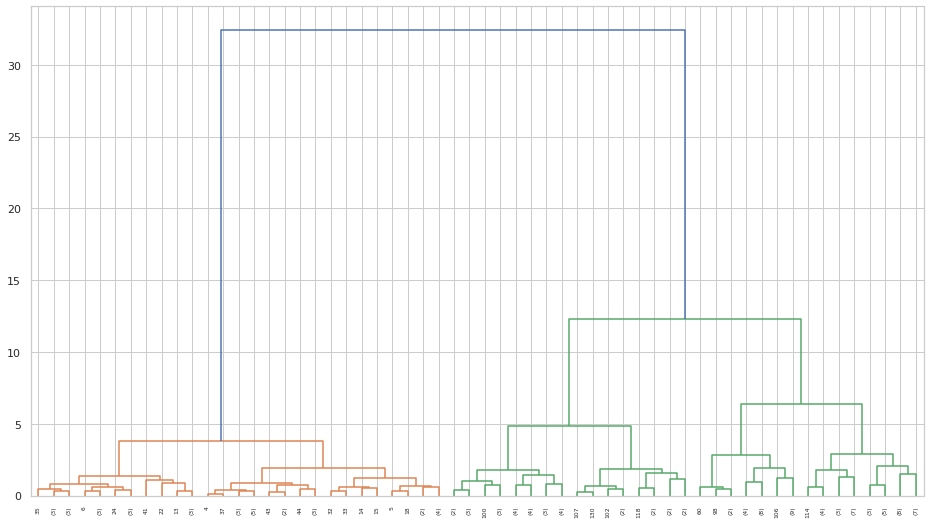

In [64]:
plot_dendrogram(model, truncate_mode='level', p=5)

## References
* [Introduction to Statistical Learning ISL (Chapter 10)](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

* [repo from tdpetrou with materials from ISL](https://github.com/tdpetrou/Machine-Learning-Books-With-Python/tree/master/Introduction%20to%20Statistical%20Learning)

* This is a video about PCA: https://youtu.be/NEaUSP4YerM

* And this one is about the explanation of variance in PCA: https://youtu.be/FgakZw6K1QQ

* See this video about k-means: https://www.youtube.com/watch?v=4b5d3muPQmA
 
* See this video for another explanation of DBSCAN https://www.youtube.com/watch?v=sJQHz97sCZ0

* Yep, there is a video about hierachical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo.